# Bank marketing Case Study

The [data](https://cdn.upgrad.com/UpGrad/temp/e4993de3-06a6-4c7d-b12f-774ce36b592e/bank.csv) is related to direct marketing campaigns of a **Portugese Banking Institution**. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be subscribed **(yes)** or not sibscribed **(no)**.

---
## Step 1: Importing Data

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all the libraries used in the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [3]:
# importing data and reading it
pd.options.display.max_columns=None
bank = pd.read_csv('bank.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


---
## Step 2: Inspecting Data

In [4]:
# counting null values of every column
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# checking datatypes and null values in each columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
# shape of data
bank.shape

(4521, 17)

In [7]:
# statistical aspects of the dataframe
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


---
## Step 3: Manipulating data

Changing all the **yes** and **no** columns to 1 and 0.

In [8]:
# list of variables which needs to be changed
col = ['default','housing','loan','y']

# function definition
def convert(x):
    return x.map({'yes':1,'no':0})

# calling the function
bank[col] = bank[col].apply(convert)

In [9]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


---
### Count of the every categorical variable present in the data

In [10]:
# count of column job
bank['job'].astype("category").value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [11]:
# count of column marital
bank['marital'].astype("category").value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [12]:
# count of column education
bank['education'].astype("category").value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [13]:
# count of column contact
bank['contact'].astype("category").value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [14]:
# count of column month
bank['month'].astype("category").value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [15]:
# count of column poutcome
bank['poutcome'].astype("category").value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

---
### Making dataframe of all the categorical columns to make dummy variables for all these categorical variables.

In [16]:
categorical = bank.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,contact,month,poutcome
0,unemployed,married,primary,cellular,oct,unknown
1,services,married,secondary,cellular,may,failure
2,management,single,tertiary,cellular,apr,failure
3,management,married,tertiary,unknown,jun,unknown
4,blue-collar,married,secondary,unknown,may,unknown


In [17]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [18]:
# concatination of two dataframes 'bank' and 'dummies'
bank = pd.concat([bank,dummies],axis=1)
bank.drop(columns=categorical.columns,axis=1,inplace=True)

In [19]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [20]:
bank.shape

(4521, 43)

In [21]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_blue-collar      4521 non-null   uint8
 12  job_entrepreneur     4521 non-null   uint8
 13  job_housemaid        4521 non-null   uint8
 14  job_management       4521 non-null   uint8
 15  job_retired          4521 non-null   uint8
 16  job_self-employed    452

#####  Now we have 43 columns in the dataframe on which we need to perform the analysis and make prediction model

---
## Checking outliers

Collecting the columns with continuous values in the dataframe and checking outliers for it

In [22]:
# collecting all the continuous valued columns in a dataframe
check_out = bank[['age','balance','day','duration','campaign','pdays','previous']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [23]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
90%,56.000000,3913.000000,28.000000,579.000000,6.000000,183.000000,2.000000
95%,59.000000,6102.000000,30.000000,763.000000,8.000000,317.000000,3.000000
99%,72.000000,14194.600000,31.000000,1259.000000,16.000000,370.000000,8.000000


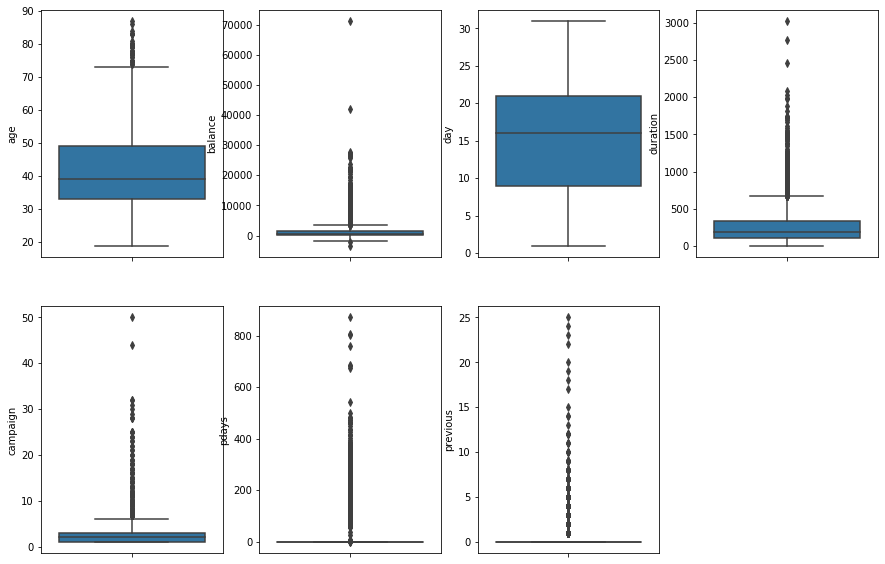

In [24]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=bank)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=bank)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=bank)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=bank)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=bank)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=bank)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=bank)

##### There are lot of outliers present in the dataframe but we can't drop them because of the very large quantity and are important for model making
---

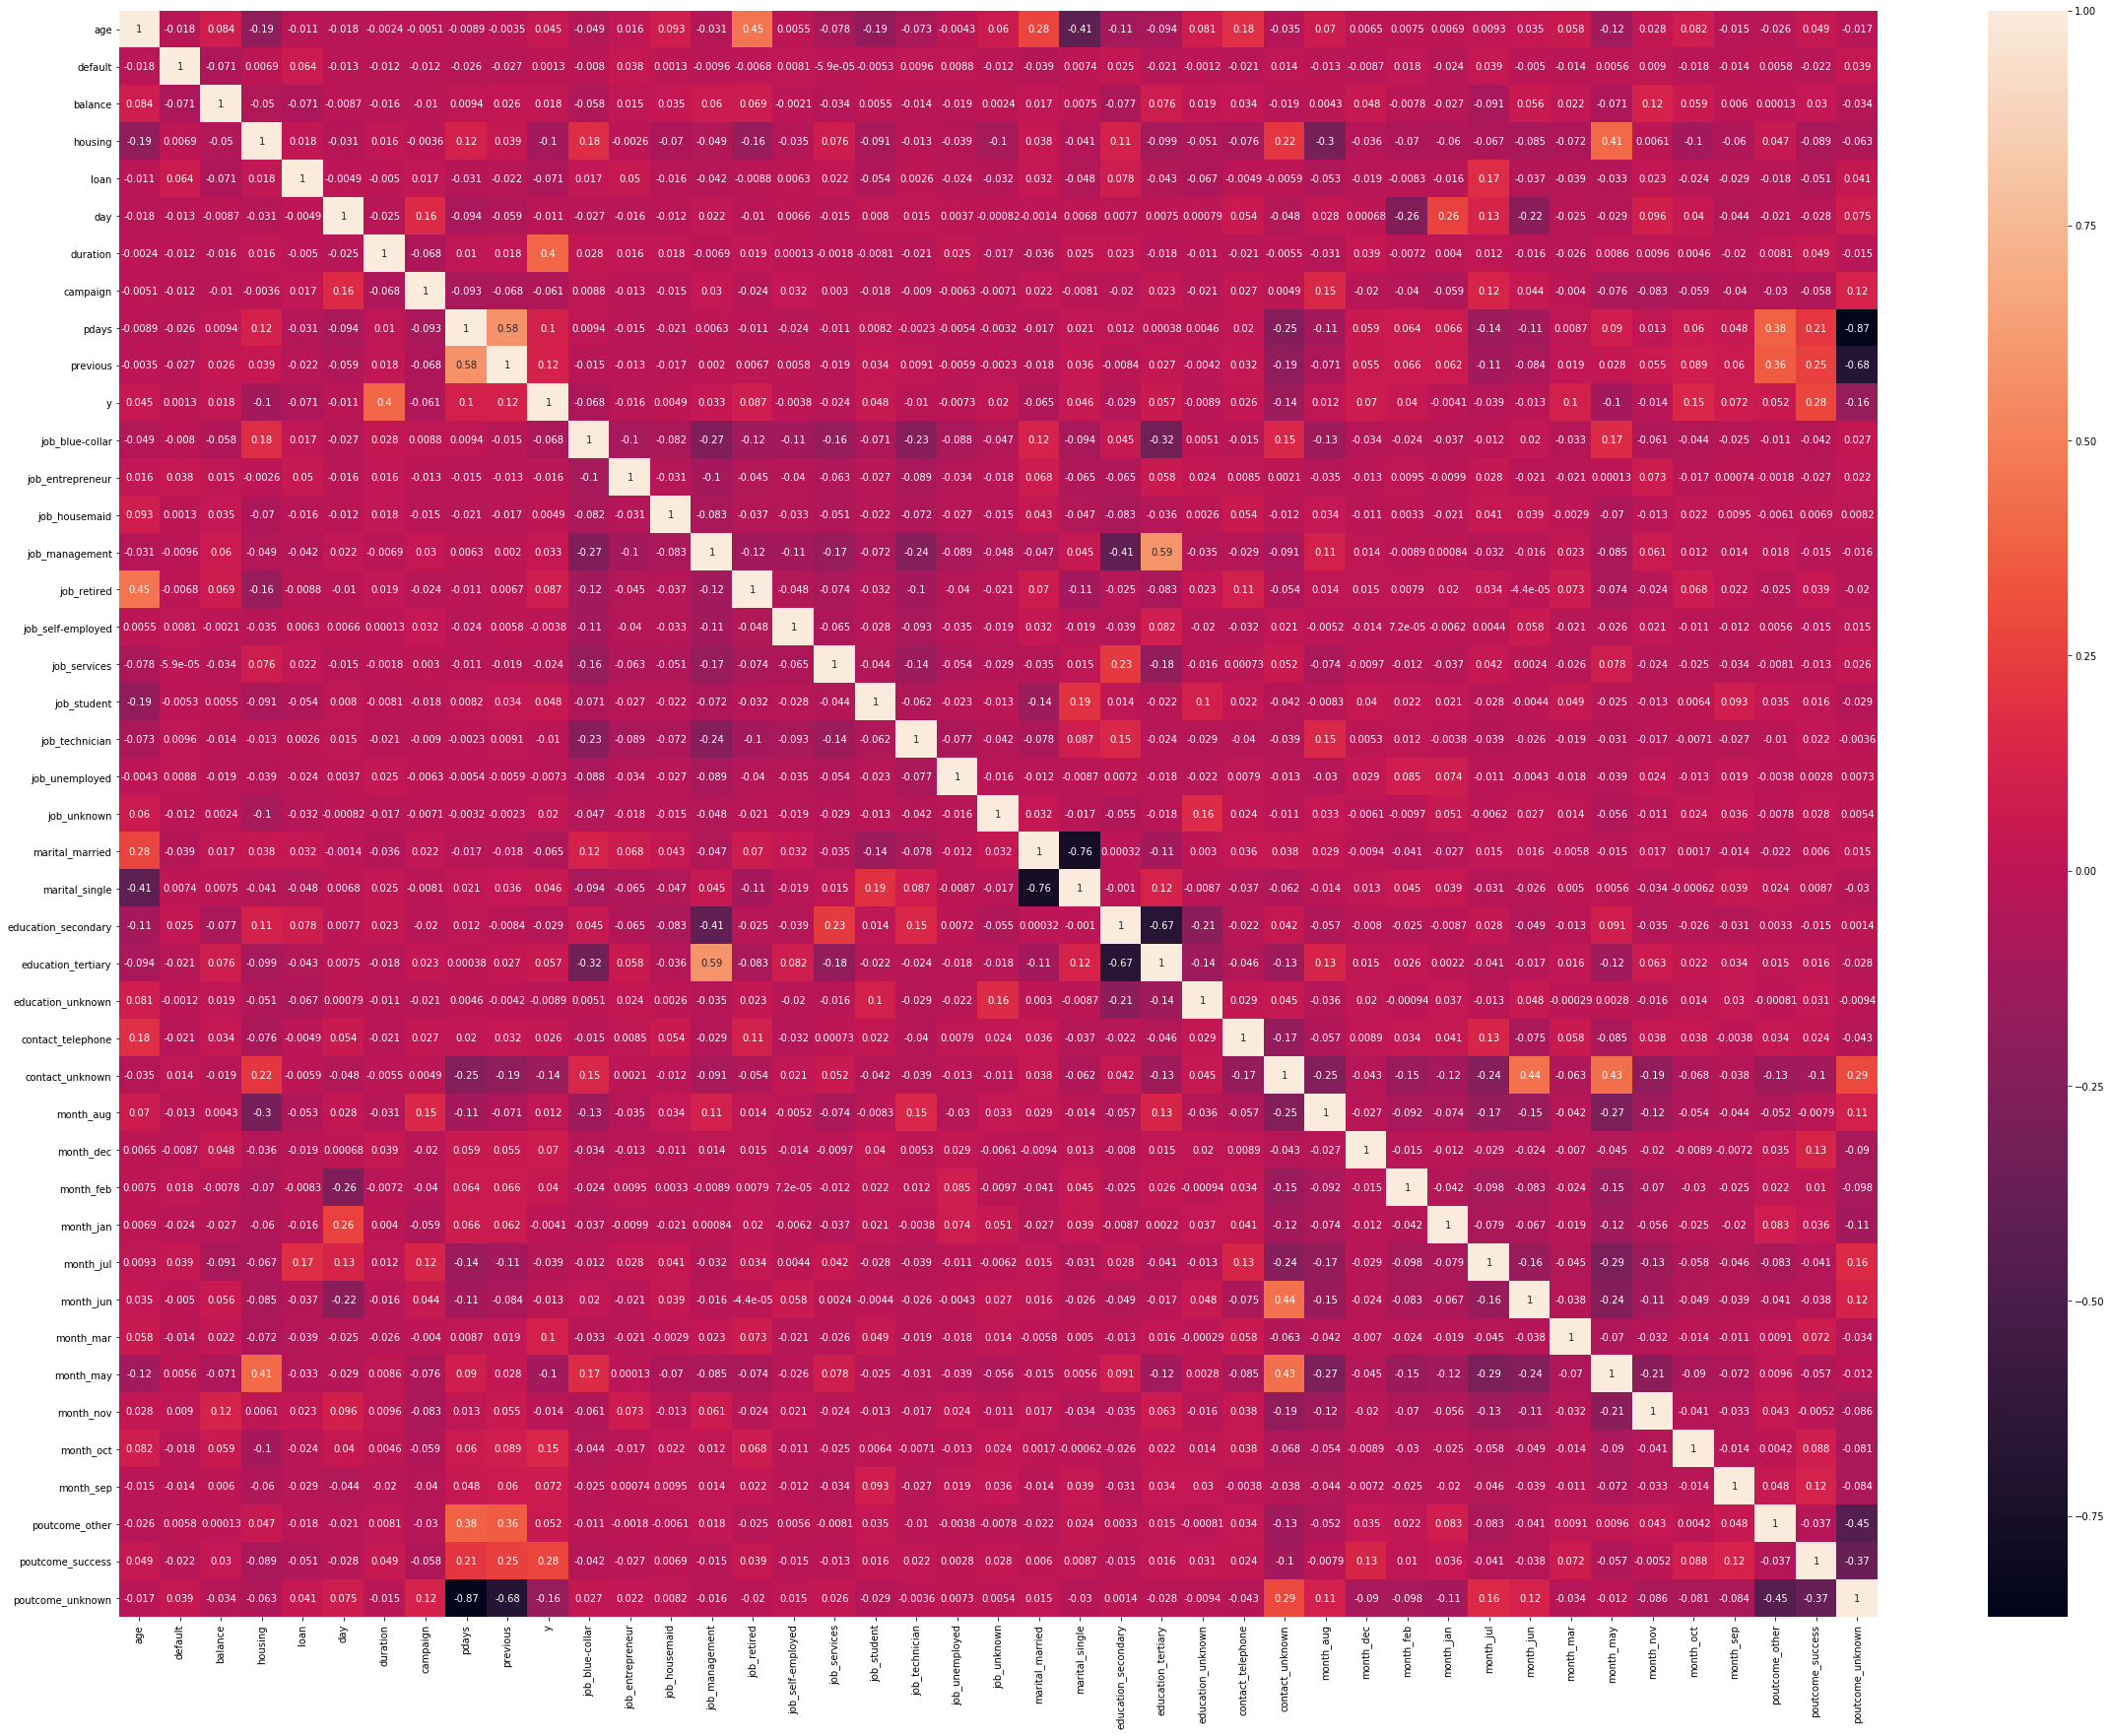

In [25]:
# Making a heatmap to find correlation
plt.figure(figsize=(40,30))
sns.heatmap(bank.corr(),annot=True)

##### We are not gonna drop any column because none of the column is very highly correlated with the target column
---

In [26]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [27]:
# subscription rate
round((sum(bank['y'])/len(bank.index))*100,2)

11.52

##### This shows that approximately 12% people are subscribed to the bank term deposit

---
##### Splitting the target variable and the predictor features in two different dataframes from Train Test Split 

In [28]:
# X will have all the features
X = bank.drop(['y'],1)
# Y will have the target variable
Y = bank['y']

In [29]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [30]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

---
## Step 3: Train Test Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

##### Splitting the data in train and test dataframe in the ratio of 7:3


---
## Step 4: Feature Scaling

In [32]:
scaler = StandardScaler()

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

In [33]:
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
2085,-0.781696,0,-0.490292,1,0,1.447256,-0.427557,0.045752,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,-0.258364,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
130,-0.017865,0,-0.410863,1,0,0.242764,-0.292605,0.045752,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,0.653984,2.002237,1.486467,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,-0.562480,-0.402013,-0.318746,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


---
## Step 5: Model Building

##### Buiding first logistic regression model 

In [34]:
# logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3121
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -787.24
Date:                Sun, 20 Sep 2020   Deviance:                       1574.5
Time:                        14:55:06   Pearson chi2:                 3.72e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1722      0.519     -2.260      0.024      -2.189      -0.155
age                    -0.0539      0.088     -0.610      0.542      -0.227       0.119
default                 0.7164      0.464      1.543      0.123      -0.193       1.626
balance                -0.0124      0.059     -0.210      0.834      -0.129       0.104
housing                -0.3888      0.163     -2.387      0.017      -0.708      -0.070
loan                   -0.7306      0.232     -3.155      0.002      -1.184      -0.277
day                     0.0698      0.080      0.877      0.381      -0.086       0.226
duration                1.0694      0.064     16.788      0.000       0.945       1.194
campaign               -0.2018      0.109     -1.857      0.063      -0.415       0.011
pdays                  -0.0571      0.120     -0.477      0.634      -0.292       0.178
previous                0.0557      0.080      0.700      0.484      -0.100       0.212
job_blue-collar        -0.4619      0.274     -1.688      0.091      -0.998       0.074
job_entrepreneur       -0.9186      0.486     -1.888      0.059      -1.872       0.035
job_housemaid          -0.4046      0.470     -0.861      0.389      -1.325       0.516
job_management         -0.2028      0.276     -0.734      0.463      -0.745       0.339
job_retired             0.6042      0.354      1.708      0.088      -0.089       1.298
job_self-employed      -0.6731      0.438     -1.537      0.124      -1.531       0.185
job_services           -0.1628      0.303     -0.538      0.591      -0.756       0.430
job_student            -0.2392      0.495     -0.484      0.629      -1.209       0.730
job_technician         -0.4955      0.264     -1.875      0.061      -1.014       0.022
job_unemployed         -1.1362      0.521     -2.183      0.029      -2.156      -0.116
job_unknown             0.2928      0.705      0.415      0.678      -1.089       1.675
marital_married        -0.4884      0.200     -2.437      0.015      -0.881      -0.096
marital_single         -0.3699      0.235     -1.575      0.115      -0.830       0.090
education_secondary     0.4286      0.252      1.700      0.089      -0.066       0.923
education_tertiary      0.6368      0.288      2.207      0.027       0.071       1.202
education_unknown      -0.1409      0.430     -0.327      0.743      -0.984       0.703
contact_telephone      -0.2968      0.287     -1.034      0.301      -0.860       0.266
contact_unknown        -1.4604      0.262     -5.567      0.000      -1.975      -0.946
month_aug              -0.7264      0.287     -2.535      0.011      -1.288      -0.165
month_dec              -0.1039      0.694     -0.150      0.881      -1.463       1.255
month_feb              -0.1150      0.344     -0.334      0.739      -0.790       0.560
mon

---
## Step 6: Feature Selection using RFE

In [35]:
logreg = LogisticRegression()

In [36]:
# Running RFE with 13 variables as output
rfe = RFE(logreg,20)
rfe = rfe.fit(x_train,y_train)

In [37]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 21),
 ('default', True, 1),
 ('balance', False, 22),
 ('housing', True, 1),
 ('loan', True, 1),
 ('day', False, 18),
 ('duration', True, 1),
 ('campaign', False, 11),
 ('pdays', False, 20),
 ('previous', False, 17),
 ('job_blue-collar', False, 4),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 10),
 ('job_management', False, 14),
 ('job_retired', True, 1),
 ('job_self-employed', False, 2),
 ('job_services', False, 15),
 ('job_student', False, 16),
 ('job_technician', False, 5),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 9),
 ('marital_married', False, 6),
 ('marital_single', False, 7),
 ('education_secondary', True, 1),
 ('education_tertiary', True, 1),
 ('education_unknown', False, 12),
 ('contact_telephone', False, 3),
 ('contact_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', False, 23),
 ('month_feb', False, 13),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 8),
 ('month_mar', True, 1),
 ('month_may', True,

In [38]:
col1 = x_train.columns[rfe.support_]
col1

Index(['default', 'housing', 'loan', 'duration', 'job_entrepreneur',
       'job_retired', 'job_unemployed', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [39]:
x_train.columns[~rfe.support_]

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_housemaid', 'job_management',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unknown', 'marital_married', 'marital_single', 'education_unknown',
       'contact_telephone', 'month_dec', 'month_feb', 'month_jun',
       'poutcome_unknown'],
      dtype='object')

##### Assessing the model with StatsModels

In [40]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3143
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.59
Date:                Sun, 20 Sep 2020   Deviance:                       1597.2
Time:                        14:55:09   Pearson chi2:                 3.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9194      0.231     -8.295      0.000      -2.373      -1.466
default                 0.7434      0.460      1.615      0.106      -0.159       1.646
housing                -0.4267      0.153     -2.783      0.005      -0.727      -0.126
loan                   -0.7108      0.229     -3.107      0.002      -1.159      -0.262
duration                1.0624      0.062     17.062      0.000       0.940       1.184
job_entrepreneur       -0.6689      0.437     -1.531      0.126      -1.525       0.187
job_retired             0.8069      0.246      3.274      0.001       0.324       1.290
job_unemployed         -0.8393      0.479     -1.753      0.080      -1.777       0.099
education_secondary     0.5143      0.207      2.482      0.013       0.108       0.920
education_tertiary      0.7683      0.218      3.527      0.000       0.341       1.195
contact_unknown        -1.3018      0.213     -6.099      0.000      -1.720      -0.883
month_aug              -0.8753      0.218     -4.021      0.000      -1.302      -0.449
month_jan              -1.1241      0.390     -2.882      0.004      -1.889      -0.360
month_jul              -1.2778      0.237     -5.387      0.000      -1.743      -0.813
month_mar               0.9604      0.385      2.492      0.013       0.205       1.716
month_may              -0.8576      0.202     -4.235      0.000      -1.254      -0.461
month_nov              -0.9398      0.263     -3.576      0.000      -1.455      -0.425
month_oct               0.9406      0.346      2.722      0.006       0.263       1.618
month_sep               0.4778      0.446      1.072      0.284      -0.396       1.351
poutcome_other          0.5694      0.254      2.239      0.025       0.071       1.068
poutcome_success        2.2631      0.257      8.793      0.000       1.759       2.768
=======================================================================================
"""

In [41]:
# predicted values of the train dataset giving the probability
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

2085    0.027552
1239    0.025600
130     0.026683
2345    0.019805
1296    0.153509
318     0.092909
2461    0.082461
1764    0.050498
2636    0.029384
2578    0.047001
dtype: float64

In [42]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02755167, 0.02559971, 0.02668323, 0.0198046 , 0.15350941,
       0.09290913, 0.08246125, 0.05049829, 0.02938389, 0.04700093])

---
##### Creating the dataframe with the actual subscription flag and the predicted probabilities

In [43]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.027552,2085
1,0,0.025600,1239
2,0,0.026683,130
3,0,0.019805,2345
4,0,0.153509,1296
5,1,0.092909,318
6,0,0.082461,2461
7,0,0.050498,1764
8,0,0.029384,2636
9,0,0.047001,2578


##### Creating new column 'predict' with 1 if Sub_prob > 0.5 else 0

In [44]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.027552,2085,0
1,0,0.025600,1239,0
2,0,0.026683,130,0
3,0,0.019805,2345,0
4,0,0.153509,1296,0
5,1,0.092909,318,0
6,0,0.082461,2461,0
7,0,0.050498,1764,0
8,0,0.029384,2636,0
9,0,0.047001,2578,0


In [45]:
# creating confusion matrix for the following prediction
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[2726,   59],
       [ 260,  119]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2726|59
**Sub**|260|119

In [46]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8991782553729456


##### The accuracy of the model is approximately 90% which is a really good model for prediction but we need to check the VIFs as well

---
### Checking VIFs for the selected 20 variables

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col1].columns
vif['VIF'] = [variance_inflation_factor(x_train[col1].values,i) for i in range(x_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,housing,2.73
7,education_secondary,2.72
14,month_may,2.36
8,education_tertiary,1.93
9,contact_unknown,1.83
12,month_jul,1.52
10,month_aug,1.45
15,month_nov,1.31
2,loan,1.25
11,month_jan,1.11


##### There are no feature in the above VIF table whose value is greater than 5. So, there is no need to drop any of these features for proceeding to the prediction. 

##### But we need to check the p-values as well from the StatsModel to proceed further.

In [48]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3143
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.59
Date:                Sun, 20 Sep 2020   Deviance:                       1597.2
Time:                        14:55:10   Pearson chi2:                 3.76e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9194      0.231     -8.295      0.000      -2.373      -1.466
default                 0.7434      0.460      1.615      0.106      -0.159       1.646
housing                -0.4267      0.153     -2.783      0.005      -0.727      -0.126
loan                   -0.7108      0.229     -3.107      0.002      -1.159      -0.262
duration                1.0624      0.062     17.062      0.000       0.940       1.184
job_entrepreneur       -0.6689      0.437     -1.531      0.126      -1.525       0.187
job_retired             0.8069      0.246      3.274      0.001       0.324       1.290
job_unemployed         -0.8393      0.479     -1.753      0.080      -1.777       0.099
education_secondary     0.5143      0.207      2.482      0.013       0.108       0.920
education_tertiary      0.7683      0.218      3.527      0.000       0.341       1.195
contact_unknown        -1.3018      0.213     -6.099      0.000      -1.720      -0.883
month_aug              -0.8753      0.218     -4.021      0.000      -1.302      -0.449
month_jan              -1.1241      0.390     -2.882      0.004      -1.889      -0.360
month_jul              -1.2778      0.237     -5.387      0.000      -1.743      -0.813
month_mar               0.9604      0.385      2.492      0.013       0.205       1.716
month_may              -0.8576      0.202     -4.235      0.000      -1.254      -0.461
month_nov              -0.9398      0.263     -3.576      0.000      -1.455      -0.425
month_oct               0.9406      0.346      2.722      0.006       0.263       1.618
month_sep               0.4778      0.446      1.072      0.284      -0.396       1.351
poutcome_other          0.5694      0.254      2.239      0.025       0.071       1.068
poutcome_success        2.2631      0.257      8.793      0.000       1.759       2.768
=======================================================================================
"""

##### We can see that some of the variables here have high p-values i.e. greater than 0.05. So we need to drop those features before moving ahead

In [49]:
# dropping column 'month_sep'
col1 = col1.drop('month_sep',1)
col1

Index(['default', 'housing', 'loan', 'duration', 'job_entrepreneur',
       'job_retired', 'job_unemployed', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [50]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3144
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -799.15
Date:                Sun, 20 Sep 2020   Deviance:                       1598.3
Time:                        14:55:10   Pearson chi2:                 3.73e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.8915      0.230     -8.232      0.000      -2.342      -1.441
default                 0.7365      0.461      1.598      0.110      -0.167       1.640
housing                -0.4349      0.153     -2.843      0.004      -0.735      -0.135
loan                   -0.7134      0.229     -3.118      0.002      -1.162      -0.265
duration                1.0602      0.062     17.040      0.000       0.938       1.182
job_entrepreneur       -0.6758      0.437     -1.548      0.122      -1.531       0.180
job_retired             0.7991      0.247      3.241      0.001       0.316       1.282
job_unemployed         -0.8369      0.475     -1.762      0.078      -1.768       0.094
education_secondary     0.5196      0.207      2.507      0.012       0.113       0.926
education_tertiary      0.7818      0.217      3.594      0.000       0.355       1.208
contact_unknown        -1.3117      0.213     -6.155      0.000      -1.729      -0.894
month_aug              -0.9122      0.215     -4.247      0.000      -1.333      -0.491
month_jan              -1.1646      0.388     -2.999      0.003      -1.926      -0.403
month_jul              -1.3067      0.235     -5.552      0.000      -1.768      -0.845
month_mar               0.9228      0.384      2.403      0.016       0.170       1.675
month_may              -0.8840      0.201     -4.408      0.000      -1.277      -0.491
month_nov              -0.9730      0.261     -3.731      0.000      -1.484      -0.462
month_oct               0.9043      0.344      2.628      0.009       0.230       1.579
poutcome_other          0.5865      0.254      2.313      0.021       0.090       1.083
poutcome_success        2.3009      0.255      9.018      0.000       1.801       2.801
=======================================================================================
"""

In [51]:
# dropping column job_entrepreneur
col1 = col1.drop('job_entrepreneur',1)
col1

Index(['default', 'housing', 'loan', 'duration', 'job_retired',
       'job_unemployed', 'education_secondary', 'education_tertiary',
       'contact_unknown', 'month_aug', 'month_jan', 'month_jul', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'poutcome_other',
       'poutcome_success'],
      dtype='object')

In [52]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3145
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -800.49
Date:                Sun, 20 Sep 2020   Deviance:                       1601.0
Time:                        14:55:11   Pearson chi2:                 3.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9133      0.230     -8.337      0.000      -2.363      -1.463
default                 0.6662      0.462      1.442      0.149      -0.239       1.572
housing                -0.4320      0.153     -2.828      0.005      -0.731      -0.133
loan                   -0.7307      0.229     -3.189      0.001      -1.180      -0.282
duration                1.0509      0.062     17.058      0.000       0.930       1.172
job_retired             0.8191      0.246      3.326      0.001       0.336       1.302
job_unemployed         -0.8128      0.475     -1.712      0.087      -1.743       0.117
education_secondary     0.5328      0.207      2.574      0.010       0.127       0.939
education_tertiary      0.7821      0.217      3.599      0.000       0.356       1.208
contact_unknown        -1.3074      0.213     -6.149      0.000      -1.724      -0.891
month_aug              -0.8972      0.214     -4.189      0.000      -1.317      -0.477
month_jan              -1.1514      0.388     -2.968      0.003      -1.912      -0.391
month_jul              -1.3281      0.235     -5.646      0.000      -1.789      -0.867
month_mar               0.9303      0.384      2.422      0.015       0.177       1.683
month_may              -0.8806      0.200     -4.398      0.000      -1.273      -0.488
month_nov              -1.0000      0.261     -3.833      0.000      -1.511      -0.489
month_oct               0.9017      0.343      2.626      0.009       0.229       1.575
poutcome_other          0.5736      0.254      2.260      0.024       0.076       1.071
poutcome_success        2.3158      0.255      9.086      0.000       1.816       2.815
=======================================================================================
"""

In [53]:
# dropping column default
col1 = col1.drop('default',1)
col1

Index(['housing', 'loan', 'duration', 'job_retired', 'job_unemployed',
       'education_secondary', 'education_tertiary', 'contact_unknown',
       'month_aug', 'month_jan', 'month_jul', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [54]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3146
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -801.42
Date:                Sun, 20 Sep 2020   Deviance:                       1602.8
Time:                        14:55:11   Pearson chi2:                 3.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9013      0.229     -8.299      0.000      -2.350      -1.452
housing                -0.4359      0.153     -2.854      0.004      -0.735      -0.137
loan                   -0.7235      0.229     -3.156      0.002      -1.173      -0.274
duration                1.0494      0.062     17.030      0.000       0.929       1.170
job_retired             0.8157      0.246      3.313      0.001       0.333       1.298
job_unemployed         -0.8212      0.474     -1.732      0.083      -1.751       0.108
education_secondary     0.5391      0.207      2.607      0.009       0.134       0.944
education_tertiary      0.7785      0.217      3.585      0.000       0.353       1.204
contact_unknown        -1.3081      0.213     -6.151      0.000      -1.725      -0.891
month_aug              -0.8963      0.214     -4.187      0.000      -1.316      -0.477
month_jan              -1.1615      0.388     -2.997      0.003      -1.921      -0.402
month_jul              -1.3237      0.235     -5.633      0.000      -1.784      -0.863
month_mar               0.9175      0.384      2.390      0.017       0.165       1.670
month_may              -0.8748      0.200     -4.376      0.000      -1.267      -0.483
month_nov              -0.9967      0.261     -3.818      0.000      -1.508      -0.485
month_oct               0.8896      0.343      2.593      0.010       0.217       1.562
poutcome_other          0.5805      0.253      2.296      0.022       0.085       1.076
poutcome_success        2.3038      0.255      9.050      0.000       1.805       2.803
=======================================================================================
"""

In [55]:
# dropping column job_unemployed
col1 = col1.drop('job_unemployed',1)
col1

Index(['housing', 'loan', 'duration', 'job_retired', 'education_secondary',
       'education_tertiary', 'contact_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [56]:
# Again creating StatsModel for checking p-values
x_train_sm = sm.add_constant(x_train[col1])
logm2 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3147
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -803.14
Date:                Sun, 20 Sep 2020   Deviance:                       1606.3
Time:                        14:55:11   Pearson chi2:                 4.62e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9514      0.228     -8.573      0.000      -2.397      -1.505
housing                -0.4234      0.153     -2.774      0.006      -0.723      -0.124
loan                   -0.7170      0.229     -3.131      0.002      -1.166      -0.268
duration                1.0426      0.061     17.013      0.000       0.922       1.163
job_retired             0.8402      0.246      3.419      0.001       0.359       1.322
education_secondary     0.5446      0.207      2.633      0.008       0.139       0.950
education_tertiary      0.7814      0.217      3.599      0.000       0.356       1.207
contact_unknown        -1.3020      0.212     -6.129      0.000      -1.718      -0.886
month_aug              -0.8604      0.213     -4.042      0.000      -1.278      -0.443
month_jan              -1.1896      0.392     -3.037      0.002      -1.957      -0.422
month_jul              -1.2901      0.234     -5.520      0.000      -1.748      -0.832
month_mar               0.9514      0.384      2.478      0.013       0.199       1.704
month_may              -0.8481      0.199     -4.255      0.000      -1.239      -0.457
month_nov              -0.9859      0.260     -3.793      0.000      -1.495      -0.476
month_oct               0.9274      0.342      2.708      0.007       0.256       1.599
poutcome_other          0.6002      0.252      2.382      0.017       0.106       1.094
poutcome_success        2.3114      0.255      9.074      0.000       1.812       2.811
=======================================================================================
"""

##### Now all the features left have a significant p-value which is good for the model 

In [57]:
# predicting the probability once again after dropping the features from data
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

2085    0.027490
1239    0.025830
130     0.024946
2345    0.018567
1296    0.255128
318     0.166012
2461    0.078660
1764    0.050053
2636    0.029428
2578    0.048216
dtype: float64

In [58]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02748993, 0.02582997, 0.02494595, 0.01856749, 0.25512809,
       0.16601157, 0.07866007, 0.05005317, 0.02942841, 0.04821636])

In [59]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,0,0.027490,2085
1,0,0.025830,1239
2,0,0.024946,130
3,0,0.018567,2345
4,0,0.255128,1296
5,1,0.166012,318
6,0,0.078660,2461
7,0,0.050053,1764
8,0,0.029428,2636
9,0,0.048216,2578


In [60]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,0,0.027490,2085,0
1,0,0.025830,1239,0
2,0,0.024946,130,0
3,0,0.018567,2345,0
4,0,0.255128,1296,0
5,1,0.166012,318,0
6,0,0.078660,2461,0
7,0,0.050053,1764,0
8,0,0.029428,2636,0
9,0,0.048216,2578,0


In [61]:
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
print(confusion)

[[2725   60]
 [ 258  121]]


##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2725|60
**Sub**|258|121

In [62]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8994943109987358


##### The accuracy has increased with a very small margin after dropping the insignificant features from model

---
## Metrics beyond simply accuracy

In [63]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [64]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.31926121372031663

In [65]:
# Let us calculate specificity
TN/float(TN+FP)

0.9784560143626571

In [66]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.02154398563734291

In [67]:
# positive predictive value 
TP/float(TP+FP)

0.6685082872928176

In [68]:
# Negative predictive value
TN/float(TN+FN)

0.9135098893731143

---
### Step 7: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [69]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

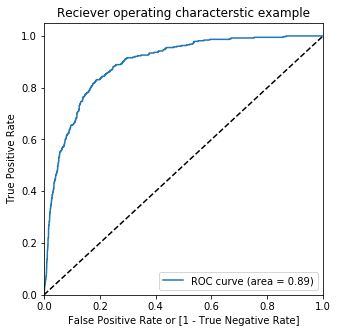

In [71]:
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

---
### Step 8: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.027490,2085,0,1,0,0,0,0,0,0,0,0,0
1,0,0.025830,1239,0,1,0,0,0,0,0,0,0,0,0
2,0,0.024946,130,0,1,0,0,0,0,0,0,0,0,0
3,0,0.018567,2345,0,1,0,0,0,0,0,0,0,0,0
4,0,0.255128,1296,0,1,1,1,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff.loc[i] = [i, accuracy, sensi, speci]
    
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.119785  1.000000  0.000000
0.1   0.1  0.787295  0.852243  0.778456
0.2   0.2  0.875790  0.638522  0.908079
0.3   0.3  0.896966  0.527704  0.947217
0.4   0.4  0.900126  0.398417  0.968402
0.5   0.5  0.899494  0.319261  0.978456
0.6   0.6  0.896334  0.255937  0.983483
0.7   0.7  0.890329  0.176781  0.987433
0.8   0.8  0.883375  0.092348  0.991023
0.9   0.9  0.882427  0.044855  0.996409


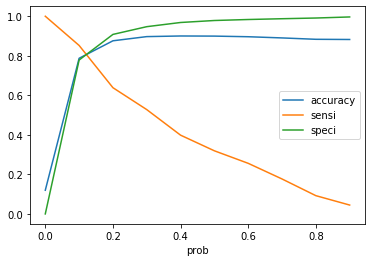

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities
cutoff.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

---
#### From the curve above, 0.15 is the optimum point to take it as a cutoff probability

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Sub_prob.map(lambda x: 1 if x>0.15 else 0)
y_train_pred_final.head()

,Sub,Sub_prob,Cust_id,predict,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.027490,2085,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.025830,1239,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.024946,130,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.018567,2345,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.255128,1296,0,1,1,1,0,0,0,0,0,0,0,1


In [76]:
metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.final_predicted)

0.8549304677623262

In [77]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.final_predicted)
confusion2

array([[2426,  359],
       [ 100,  279]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|2426|359
**Sub**|100|279

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.7361477572559367

In [80]:
# Let us calculate specificity
TN/float(TN+FP)

0.8710951526032316

In [81]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/float(TN+FP)

0.1289048473967684

In [82]:
# Positive predictive value 
TP/float(TP+FP)

0.4373040752351097

In [83]:
# Negative predictive value
TN/float(TN+ FN)

0.9604117181314331

---
## Precision and Recall

In [84]:
# Looking at the confusion matrix again
confusion

array([[2725,   60],
       [ 258,  121]], dtype=int64)

In [85]:
# Second confusion matrix
confusion2

array([[2426,  359],
       [ 100,  279]], dtype=int64)

##### Precision
TP / TP + FP

In [86]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6685082872928176

##### Recall
TP / TP + FN

In [87]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.31926121372031663

---
#### Using sklearn utilities for finding precision and recall

In [88]:
precision_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.6685082872928176

In [89]:
recall_score(y_train_pred_final.Sub, y_train_pred_final.predict)

0.31926121372031663

---
## Step 9: Precision and Recall takeoff

In [90]:
y_train_pred_final.Sub, y_train_pred_final.predict

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: Sub, Length: 3164, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: predict, Length: 3164, dtype: int64)

In [91]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)

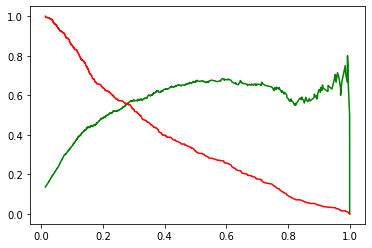

In [92]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

---
## Step 10: Making predictions on Test data

In [93]:
# transforming the test data
x_test[['age','balance','day','duration','campaign','pdays','previous']] = scaler.transform(x_test[['age','balance','day','duration','campaign','pdays','previous']])

In [94]:
x_test = x_test[col1]
x_test.head()

,housing,loan,duration,job_retired,education_secondary,education_tertiary,contact_unknown,month_aug,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,poutcome_other,poutcome_success
3731,0,0,-0.457546,1,1,0,0,0,0,0,0,0,1,0,0,0
2367,1,0,1.326816,0,0,0,1,0,0,0,0,1,0,0,0,0
1166,0,0,0.202218,0,0,1,0,0,0,0,0,0,0,0,0,1
2973,1,1,1.428030,0,1,0,1,0,0,0,0,1,0,0,0,0
2139,0,0,-0.108921,0,0,1,0,0,0,1,0,0,0,0,0,0


In [95]:
x_test_sm = sm.add_constant(x_test)

---
##### Making predictions on the test data 

In [96]:
y_test_pred = res.predict(x_test_sm)

In [97]:
y_test_pred[:10]

3731    0.116140
2367    0.041423
1166    0.794494
2973    0.038847
2139    0.070857
731     0.012352
1640    0.013771
4208    0.038354
2152    0.029139
107     0.177268
dtype: float64

In [98]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [99]:
y_pred_1.head()

,0
3731,0.116140
2367,0.041423
1166,0.794494
2973,0.038847
2139,0.070857


In [100]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [101]:
# Putting Cust_id to index
y_test_df['Cust_id'] = y_test_df.index

In [102]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [103]:
# Appending y_test_df and y_pred_1
y_pred = pd.concat([y_test_df,y_pred_1],axis=1)

In [104]:
y_pred.head()

,y,Cust_id,0
0,0,3731,0.116140
1,0,2367,0.041423
2,1,1166,0.794494
3,1,2973,0.038847
4,0,2139,0.070857


In [105]:
# renaming the columns
y_pred.rename(columns={'y':'Sub',0:'Sub_prob'},inplace=True)

In [106]:
y_pred.head()

,Sub,Cust_id,Sub_prob
0,0,3731,0.116140
1,0,2367,0.041423
2,1,1166,0.794494
3,1,2973,0.038847
4,0,2139,0.070857


In [107]:
# putting the limit of 0.25 from the precision_recall_curve
y_pred['final_predict'] = y_pred.Sub_prob.map(lambda x: 1 if x>0.25 else 0)

In [108]:
y_pred.head()

,Sub,Cust_id,Sub_prob,final_predict
0,0,3731,0.116140,0
1,0,2367,0.041423,0
2,1,1166,0.794494,1
3,1,2973,0.038847,0
4,0,2139,0.070857,0


In [109]:
# overall accuracy of the model on test data
metrics.accuracy_score(y_pred.Sub, y_pred.final_predict)

0.9027266028002948

In [110]:
confusion3 = metrics.confusion_matrix(y_pred.Sub, y_pred.final_predict)
confusion3

array([[1137,   78],
       [  54,   88]], dtype=int64)

##### Confusion Matrix
Actual/Predicted|Non Sub|Sub
----------------|-------|---
**Non Sub**|1137|78
**Sub**|54|88

In [111]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
TP/float(TP+FN)

0.6197183098591549

In [113]:
# Let us calculate specificity
TN/float(TN+FP)

0.9358024691358025